# OpenMesh Dataset - Wireless Backhaul Link Data

This notebook demonstrates how to load and explore the OpenMesh dataset, which contains Microwave Link data from the NYC Community Mesh Network collected between October 2023 and July 2024.

## Import Libraries

Load the required Python packages for data analysis and visualization.

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import netCDF4 as nc
print("Libraries loaded successfully")

Libraries loaded successfully


## Load Dataset

The dataset is stored in netCDF format and can be opened using xarray.

In [4]:
import xarray as xr
import pandas as pd

# Load the OpenMesh dataset
file_path = 'ds_openmesh.nc'
ds = xr.open_dataset(file_path)

print("Dataset loaded successfully!")


# Load the metadata
metadata_path = 'links_metadata.csv'
df_metadata = pd.read_csv(metadata_path, index_col=0)

# Round length to 1 decimal place


Dataset loaded successfully!


## Dataset Overview

Get a quick look at the dataset structure, dimensions, and variables.

In [5]:
print("="*80)
print("DATASET OVERVIEW")
print("="*80)
print(ds)
print(ds.attrs)

DATASET OVERVIEW
<xarray.Dataset> Size: 322MB
Dimensions:       (cml_id: 75, sublink_id: 3, time: 354241)
Coordinates:
  * time          (time) datetime64[ns] 3MB 2023-10-29 ... 2024-07-01
  * sublink_id    (sublink_id) object 24B 'sublink_1' 'sublink_2' 'sublink_3'
    site_0_lat    (cml_id) float32 300B ...
    site_0_lon    (cml_id) float32 300B ...
    site_1_lat    (cml_id) float32 300B ...
    site_1_lon    (cml_id) float32 300B ...
    length        (cml_id) float32 300B ...
    frequency     (cml_id, sublink_id) float32 900B ...
    polarization  (cml_id, sublink_id) object 2kB ...
  * cml_id        (cml_id) <U2 600B '1' '2' '3' '4' '5' ... '72' '73' '74' '75'
Data variables:
    rsl           (cml_id, sublink_id, time) float32 319MB ...
Attributes:
    title:                 OpenMesh
    file_author:           Dror Jacoby
    institution:           Cellular Environmental Monitoring (CellEnMon) Lab,...
    date:                  2025-11-01
    source:                Community N

## Dimensions

The dataset has three main dimensions: time (temporal), cml_id, and sublink_id (channels).

In [6]:
print("DATASET DIMENSIONS")
print("-"*50)
for dim, size in ds.sizes.items():
    print(f"  {dim:15s}: {size:,}")

print(f"\nTotal data points: {ds.rsl.size:,}")
print(f"Time coverage: {(ds.time.values[-1] - ds.time.values[0]) / np.timedelta64(1, 'D'):.0f} days")

DATASET DIMENSIONS
--------------------------------------------------
  cml_id         : 75
  sublink_id     : 3
  time           : 354,241

Total data points: 79,704,225
Time coverage: 246 days


## Coordinates Summary

Explore the spatial, temporal, and technical characteristics of the network.

In [7]:
print("COORDINATES SUMMARY")
print("-"*50)

print("\nTemporal:")
print(f"  Time range: {pd.to_datetime(ds.time.values[0])} to {pd.to_datetime(ds.time.values[-1])}")

print("\nNetwork:")
print(f"  Number of Links: {len(ds.cml_id)}")
print(f"  Link IDs (first 5): {ds.cml_id.values[:5]}")
print(f"  Sublinks per Link: {len(ds.sublink_id)}")
print(f"  Sublink IDs: {ds.sublink_id.values}")

print("\nTechnical:")
print(f"  Frequency range: {ds.frequency.values.min():.2f} - {ds.frequency.values.max():.2f} MHz")
print(f"  Polarisations: {np.unique(ds.polarization.values)}")
print(f"  Link lengths: {ds.length.values.min():.0f} - {ds.length.values.max():.0f} m")

COORDINATES SUMMARY
--------------------------------------------------

Temporal:
  Time range: 2023-10-29 00:00:00 to 2024-07-01 00:00:00

Network:
  Number of Links: 75
  Link IDs (first 5): ['1' '2' '3' '4' '5']
  Sublinks per Link: 3
  Sublink IDs: ['sublink_1' 'sublink_2' 'sublink_3']

Technical:
  Frequency range: nan - nan MHz
  Polarisations: ['v']
  Link lengths: 24 - 6936 m


## Data Variables

Each data variable contains the measurements. Here we inspect their properties and metadata.

In [8]:
print("DATA VARIABLES")
print("-"*50)
for var in ds.data_vars:
    print(f"\n{var}:")
    print(f"  Dimensions: {ds[var].dims}")
    print(f"  Shape: {ds[var].shape}")
    print(f"  Data type: {ds[var].dtype}")
    print(f"  Units: {ds[var].attrs.get('units', 'N/A')}")
    print(f"  Description: {ds[var].attrs.get('long_name', 'N/A')}")

DATA VARIABLES
--------------------------------------------------

rsl:
  Dimensions: ('cml_id', 'sublink_id', 'time')
  Shape: (75, 3, 354241)
  Data type: float32
  Units: dBm
  Description: received_signal_level


## Dataset Metadata

Global attributes provide information about the dataset origin, processing, and documentation.

In [9]:
print("DATASET METADATA")
print("-"*50)
for attr in ['title', 'institution', 'source', 'history', 'comment']:
    if attr in ds.attrs:
        val = str(ds.attrs[attr])
        if len(val) > 80:
            print(f"\n{attr}:")
            print(f"  {val[:77]}...")
        else:
            print(f"\n{attr}: {val}")

DATASET METADATA
--------------------------------------------------

title: OpenMesh

institution:
  Cellular Environmental Monitoring (CellEnMon) Lab, School of Electrical Engin...

source: Community NYC Mesh Wireless Network

history: 2025-11-01: Updated metadata, converted netCDF → OpenSense-1.0 CML format

comment:
  OpenMesh: Wireless Signal Dataset for Opportunistic Urban Weather Sensing in ...


## Data Quality Assessment

Check data completeness and basic statistics of the received signal level measurements.

In [12]:
print("DATA ASSESSMENT")
print("-"*50)

print(f"\nRSL Statistics:")
print(f"  Min: {np.nanmin(ds.rsl.values):.2f} dBm")
print(f"  Max: {np.nanmax(ds.rsl.values):.2f} dBm")
print(f"  Mean: {np.nanmean(ds.rsl.values):.2f} dBm")
print(f"  Median: {np.nanmedian(ds.rsl.values):.2f} dBm")

DATA ASSESSMENT
--------------------------------------------------

RSL Statistics:
  Min: -96.00 dBm
  Max: -13.00 dBm
  Mean: -59.73 dBm
  Median: -59.00 dBm


## Visualization Examples: Link Time Series



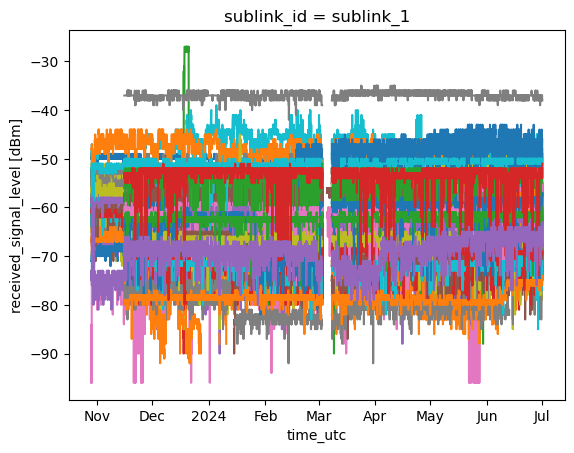

In [11]:
ds.rsl.isel(sublink_id=0).resample(time='1h').min().plot.line(x='time', add_legend=False);

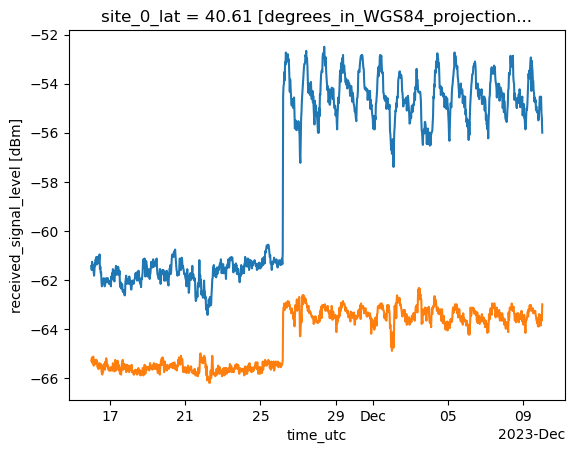

In [13]:
ds.rsl.isel(cml_id=20).sel(
    time=slice(
        pd.Timestamp('2023-10-25'),
        pd.Timestamp('2023-12-10')
    )
).resample(time='0.5h').mean().plot.line(x='time', add_legend=False)
plt.show()

/Users/drorjac/miniforge3/envs/openmesh/lib/python3.11/site-packages/xarray/groupers.py:530: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(


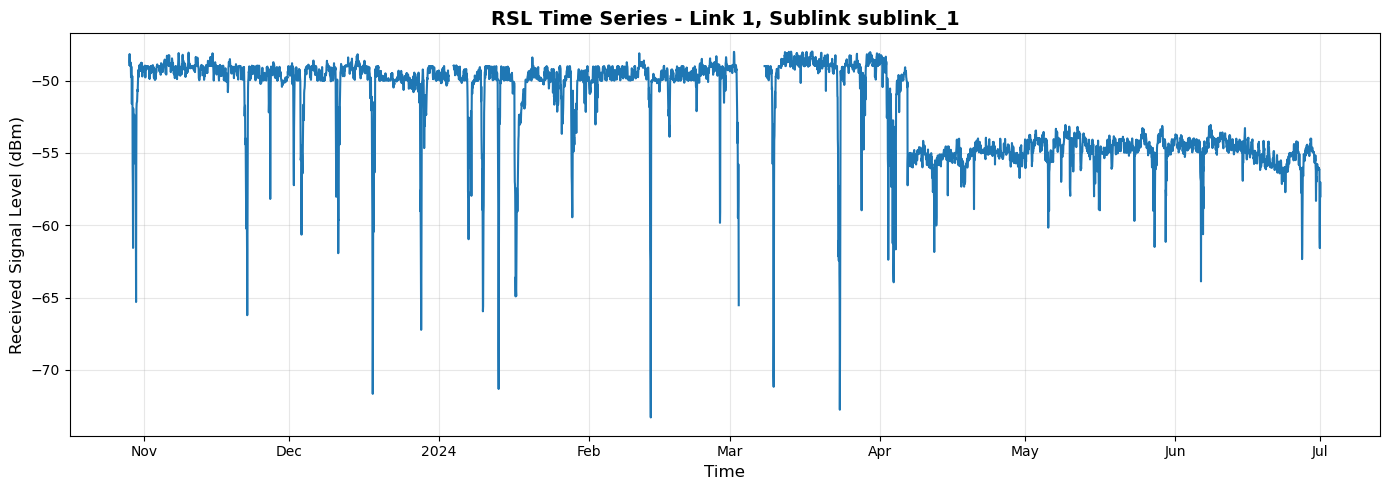

In [14]:
## Visualization Example 1: Single Link Time Series


fig, ax = plt.subplots(figsize=(14, 5))

# Select first link and first sublink
link_idx = 0
sublink_idx = 0

# Plot hourly resampled data
ds.rsl.isel(cml_id=link_idx, sublink_id=sublink_idx).resample(time='1H').mean().plot(ax=ax)

ax.set_title(f'RSL Time Series - Link {ds.cml_id.values[link_idx]}, Sublink {ds.sublink_id.values[sublink_idx]}', 
             fontsize=14, fontweight='bold')
ax.set_ylabel('Received Signal Level (dBm)', fontsize=12)
ax.set_xlabel('Time', fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Visualization Example 2: Multi-Sublink Comparison

Compare all sublinks for a single link to see how different frequency channels behave.

/Users/drorjac/miniforge3/envs/openmesh/lib/python3.11/site-packages/xarray/groupers.py:530: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(
/Users/drorjac/miniforge3/envs/openmesh/lib/python3.11/site-packages/xarray/groupers.py:530: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(
/Users/drorjac/miniforge3/envs/openmesh/lib/python3.11/site-packages/xarray/groupers.py:530: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(


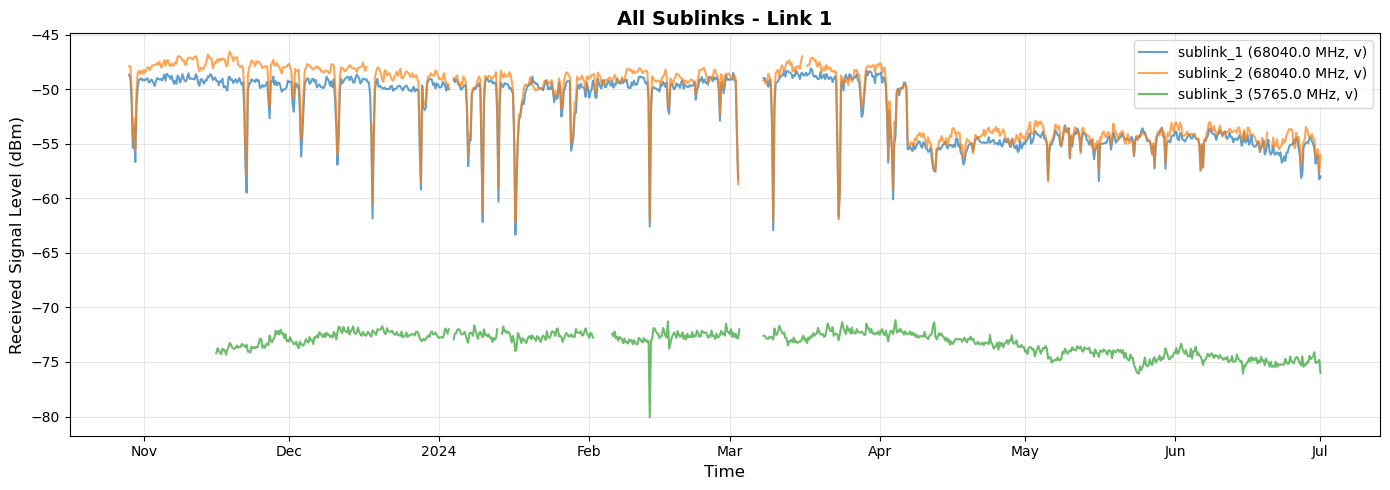

In [15]:
fig, ax = plt.subplots(figsize=(14, 5))

link_idx = 0

# Plot all sublinks for one link
for i, sublink in enumerate(ds.sublink_id.values):
    freq = ds.frequency.isel(cml_id=link_idx, sublink_id=i).values
    pol = ds.polarization.isel(cml_id=link_idx, sublink_id=i).values
    
    ds.rsl.isel(cml_id=link_idx, sublink_id=i).resample(time='6H').mean().plot(
        ax=ax, 
        label=f'{sublink} ({freq:.1f} MHz, {pol})', 
        alpha=0.7
    )

ax.set_title(f'All Sublinks - Link {ds.cml_id.values[link_idx]}', fontsize=14, fontweight='bold')
ax.set_ylabel('Received Signal Level (dBm)', fontsize=12)
ax.set_xlabel('Time', fontsize=12)
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Format Compliance Check

Verify that the dataset follows the OpenSense-1.0 format specification for CML data.

In [16]:
print("="*80)
print("FORMAT COMPLIANCE CHECK (OpenSense-1.0)")
print("="*80)

compliance = []

# Dimension checks
compliance.append(("Dimensions (time, cml_id, sublink_id)", 
                  all(d in ds.dims for d in ['time', 'cml_id', 'sublink_id'])))

# Coordinate type checks
compliance.append(("time is datetime64", ds.time.dtype.kind == 'M'))
compliance.append(("cml_id is string", ds.cml_id.dtype.kind in ['U', 'S', 'O']))
compliance.append(("sublink_id is string", ds.sublink_id.dtype.kind in ['U', 'S', 'O']))

# Required auxiliary coordinates
required_coords = ['site_0_lat', 'site_0_lon', 'site_1_lat', 'site_1_lon', 'frequency']
compliance.append(("Required coordinates present", 
                  all(c in ds.coords for c in required_coords)))


# Data variable checks
compliance.append(("rsl variable present", 'rsl' in ds.data_vars))
compliance.append(("rsl has correct dimensions", 
                  ds.rsl.dims == ('cml_id', 'sublink_id', 'time')))

print("\nCompliance Results:")
for check, result in compliance:
    status = '✓' if result else '✗'
    print(f"  {status} {check}")

all_pass = all(result for _, result in compliance)
print("\n" + "="*80)
if all_pass:
    print("✓ Dataset is OpenSense-1.0 compliant")
else:
    print("⚠ Some compliance checks failed")
print("="*80)

FORMAT COMPLIANCE CHECK (OpenSense-1.0)

Compliance Results:
  ✓ Dimensions (time, cml_id, sublink_id)
  ✓ time is datetime64
  ✓ cml_id is string
  ✓ sublink_id is string
  ✓ Required coordinates present
  ✓ rsl variable present
  ✓ rsl has correct dimensions

✓ Dataset is OpenSense-1.0 compliant


## Meta Data


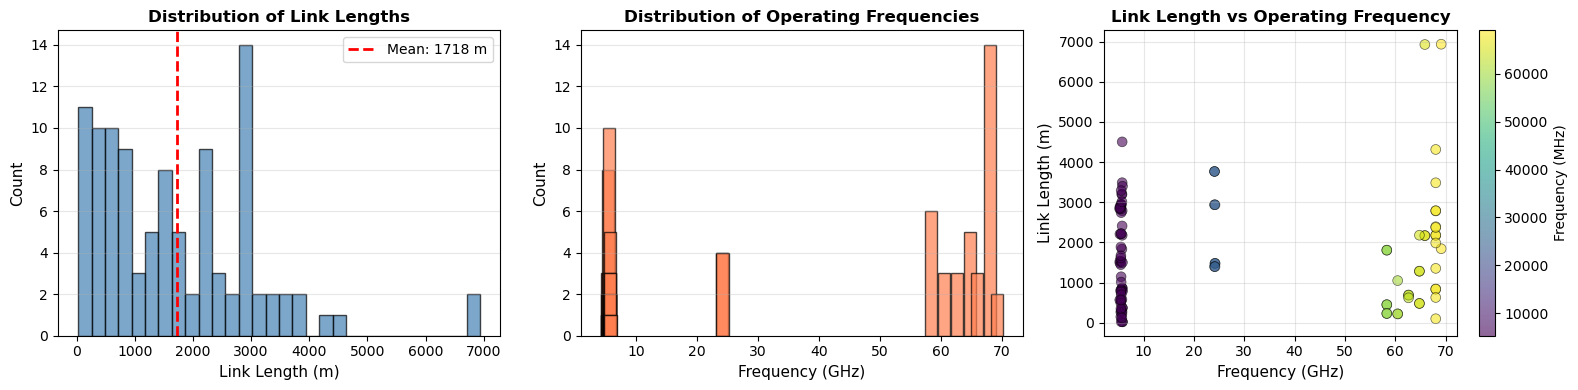

Total sublinks: 103
Length range: 24.5 - 6936.5 m
Frequency range: 5.3 - 69.1 GHz


In [17]:
import matplotlib.pyplot as plt
df= df_metadata
# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Histogram 1: Link Length Distribution
axes[0].hist(df['length'], bins=30, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Link Length (m)', fontsize=11)
axes[0].set_ylabel('Count', fontsize=11)
axes[0].set_title('Distribution of Link Lengths', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
axes[0].axvline(df['length'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["length"].mean():.0f} m')
axes[0].legend()

# Histogram 2: Frequency Distribution
freq_counts = df['frequency'].value_counts().sort_index()
axes[1].bar(freq_counts.index / 1000, freq_counts.values, color='coral', alpha=0.7, edgecolor='black', width=2)
axes[1].set_xlabel('Frequency (GHz)', fontsize=11)
axes[1].set_ylabel('Count', fontsize=11)
axes[1].set_title('Distribution of Operating Frequencies', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Scatter plot: Length vs Frequency
scatter = axes[2].scatter(df['frequency'] / 1000, df['length'],
                          c=df['frequency'], cmap='viridis',
                          alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[2].set_xlabel('Frequency (GHz)', fontsize=11)
axes[2].set_ylabel('Link Length (m)', fontsize=11)
axes[2].set_title('Link Length vs Operating Frequency', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=axes[2], label='Frequency (MHz)')

plt.tight_layout()
plt.show()

print(f"Total sublinks: {len(df)}")
print(f"Length range: {df['length'].min():.1f} - {df['length'].max():.1f} m")
print(f"Frequency range: {df['frequency'].min()/1000:.1f} - {df['frequency'].max()/1000:.1f} GHz")

## Cleanup

Close the dataset to free resources.

In [18]:
ds.close()
print("Dataset closed")

Dataset closed
